# Input data

- The TSV file `SampleData.tsv` has the following columns

    - <b>Sample</b>: Sample IDs (S01, S02, S03...)
    - <b>Treatment</b>: Information on sample type 
    
        - <i>HF+</i>: Blood plasma samples collected from coronary disease patients post major surgery who had a heart failure within 3 years of surgery
        - <i>HF-</i>: Blood plasma samples collected from coronary disease patients post major surgery who recovered post surgery without heart failure
        - <i>HVOL</i>: Blood plasma samples collected from individuals without any discernable coronary disease
        
        
    
- The gzipped file `GSE208194_RawTPM.csv.gz` contains gene expression information for the sample mentioned in `SampleData.tsv` where the file structure looks like

ENSEMBL ID        |S01      |S02      |S03      |S04
:-----------------|:--------|:--------|:--------|:--------
ENSG00000000419.12|2.398878 |12.157726|1.40211  |7.667875
ENSG00000000938.13|3.324077 |13.971038|1.917631 |10.225812
ENSG00000001629.10|12.037059|1.453811 |12.596614|15.799738
ENSG00000001631.15|1.287932 |5.842868 |1.412257 |1.526812

Where each row is a feature/gene (n=4150) and each column is a sample where the features are measured.


# Feature filter*

- Remove genes/features with very low expression values (< 1) in 70% of samples (even if they are good features they cannot be used for diagnositics)
- Remove a member of feature pairs which are highly correlated
- Provide the statistics with respect to the removals

In [2]:
# Place your code here
import numpy as np
import pandas as pd
Treatment = pd.read_csv('SampleData.tsv',sep='\t')
Treatment.head()

,sample,treatment
0,S01,HF-
1,S02,HF-
2,S03,HF-
3,S04,HF-
4,S05,HF-


In [85]:
label_to_int = {'HF+':0, 'HF-':1, 'HVOL':2}
int_to_label = {0:'HF+', 1:'HF-', 2:'HVOL'}

In [3]:
# Assign numeric value to output class
Treatment['treatment'].replace(['HF+', 'HF-', 'HVOL'],[0,1,2], inplace=True)
Treatment.head()

,sample,treatment
0,S01,1
1,S02,1
2,S03,1
3,S04,1
4,S05,1


In [4]:
# Set cut-off for very low expression values (< 1) in 70% of samples 
cut_off = int(len(Treatment)*0.7)
cut_off

64

In [5]:
#In CSV has format of [features x samples], So we convert it to [samples x feature] for convenient
df = pd.read_csv('GSE208194_RawTPM.csv.gz').T

#Get column names of dataframe 
df.columns=df.iloc[0]

#Add new column named sample containing samples to match with dataframe of SampleData.tsv
df['sample'] = df.index
df = df.drop('ENSEMBL ID')
df.head()

ENSEMBL ID,ENSG00000000419.12,ENSG00000000938.13,ENSG00000001629.10,ENSG00000001631.15,ENSG00000002549.12,ENSG00000002586.20,ENSG00000002834.18,ENSG00000003056.8,ENSG00000003147.19,ENSG00000003402.20,...,ENSG00000286021.2,ENSG00000286147.1,ENSG00000286171.1,ENSG00000286522.1,ENSG00000286834.1,ENSG00000287080.1,ENSG00000287160.1,ENSG00000287825.1,ENSG00000288560.1,sample
S01,2.398878,3.324077,12.037059,1.287932,2.914606,106.458644,7.243743,3.443131,6.531775,79.598523,...,2.951689,2.780988,22.090146,38.558169,1.446729,8.543461,3.392143,8.54341,8.36187,S01
S02,12.157726,13.971038,1.453811,5.842868,32.566404,40.094091,22.43391,1.512845,3.252381,122.045223,...,69.319858,66.183243,79.348496,285.735258,101.312666,48.482781,57.089139,26.198111,3.218659,S02
S03,1.40211,1.917631,12.596614,1.412257,2.231871,124.158648,5.942053,8.835538,5.433218,48.646713,...,6.950649,12.663118,18.383923,36.159325,17.10636,11.492971,7.379778,9.731645,2.560132,S03
S04,7.667875,10.225812,15.799738,1.526812,35.4449,51.141639,17.521034,6.539876,13.176043,109.224603,...,67.810987,88.524134,34.275493,125.344512,109.49099,40.763492,67.437197,5.939315,4.12353,S04
S05,4.198525,2.847621,17.246205,7.261625,9.212083,71.778619,5.453753,4.370199,7.352974,108.900379,...,12.891301,24.227999,39.581215,111.782471,33.09699,23.798352,17.519094,13.91137,5.092169,S05


In [6]:
#Merge both dataframe on column "sample",
result = pd.merge(df, Treatment, on="sample", how='left')
result

,ENSG00000000419.12,ENSG00000000938.13,ENSG00000001629.10,ENSG00000001631.15,ENSG00000002549.12,ENSG00000002586.20,ENSG00000002834.18,ENSG00000003056.8,ENSG00000003147.19,ENSG00000003402.20,...,ENSG00000286147.1,ENSG00000286171.1,ENSG00000286522.1,ENSG00000286834.1,ENSG00000287080.1,ENSG00000287160.1,ENSG00000287825.1,ENSG00000288560.1,sample,treatment
0,2.398878,3.324077,12.037059,1.287932,2.914606,106.458644,7.243743,3.443131,6.531775,79.598523,...,2.780988,22.090146,38.558169,1.446729,8.543461,3.392143,8.54341,8.36187,S01,1
1,12.157726,13.971038,1.453811,5.842868,32.566404,40.094091,22.43391,1.512845,3.252381,122.045223,...,66.183243,79.348496,285.735258,101.312666,48.482781,57.089139,26.198111,3.218659,S02,1
2,1.40211,1.917631,12.596614,1.412257,2.231871,124.158648,5.942053,8.835538,5.433218,48.646713,...,12.663118,18.383923,36.159325,17.10636,11.492971,7.379778,9.731645,2.560132,S03,1
3,7.667875,10.225812,15.799738,1.526812,35.4449,51.141639,17.521034,6.539876,13.176043,109.224603,...,88.524134,34.275493,125.344512,109.49099,40.763492,67.437197,5.939315,4.12353,S04,1
4,4.198525,2.847621,17.246205,7.261625,9.212083,71.778619,5.453753,4.370199,7.352974,108.900379,...,24.227999,39.581215,111.782471,33.09699,23.798352,17.519094,13.91137,5.092169,S05,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,25.222543,17.525907,89.995748,7.899247,28.69172,55.245745,42.377442,64.245814,30.129237,237.696308,...,9.409992,10.441533,559.390098,23.370109,2.688918,23.094887,7.114563,4.563028,S88,2
85,17.73463,10.903512,32.951226,11.006974,33.123814,56.911321,19.254234,5.987356,12.130276,127.585057,...,19.978202,31.744585,387.044359,34.169966,9.531408,19.040575,4.664343,10.941191,S89,2
86,5.057123,1.257853,12.263058,6.447497,6.70947,271.525037,6.904848,13.699922,7.758268,110.033203,...,3.483134,27.933352,89.231794,5.444215,2.823952,1.324381,20.376778,7.220862,S90,2
87,0.968332,1.025641,5.968981,2.786651,1.214385,154.849235,10.530023,3.465649,4.376058,49.63806,...,4.340778,15.813597,27.761897,4.262073,0.107894,4.329463,1.601362,1.568828,S95,1


### Observation: </br>
SampleData.tsv has 92 samples, where GSE208194_RawTPM.csv.gz has only 89 samples. So, there are three samples missing from GSE208194_RawTPM.csv.gz.

In [7]:
#Target data
target = result['treatment']

#Features
data = result.drop(['sample', 'treatment'], axis=1).apply(pd.to_numeric) 
data.head()

,ENSG00000000419.12,ENSG00000000938.13,ENSG00000001629.10,ENSG00000001631.15,ENSG00000002549.12,ENSG00000002586.20,ENSG00000002834.18,ENSG00000003056.8,ENSG00000003147.19,ENSG00000003402.20,...,ENSG00000285976.2,ENSG00000286021.2,ENSG00000286147.1,ENSG00000286171.1,ENSG00000286522.1,ENSG00000286834.1,ENSG00000287080.1,ENSG00000287160.1,ENSG00000287825.1,ENSG00000288560.1
0,2.398878,3.324077,12.037059,1.287932,2.914606,106.458644,7.243743,3.443131,6.531775,79.598523,...,4.386403,2.951689,2.780988,22.090146,38.558169,1.446729,8.543461,3.392143,8.543410,8.361870
1,12.157726,13.971038,1.453811,5.842868,32.566404,40.094091,22.433910,1.512845,3.252381,122.045223,...,10.137873,69.319858,66.183243,79.348496,285.735258,101.312666,48.482781,57.089139,26.198111,3.218659
2,1.402110,1.917631,12.596614,1.412257,2.231871,124.158648,5.942053,8.835538,5.433218,48.646713,...,3.925357,6.950649,12.663118,18.383923,36.159325,17.106360,11.492971,7.379778,9.731645,2.560132
3,7.667875,10.225812,15.799738,1.526812,35.444900,51.141639,17.521034,6.539876,13.176043,109.224603,...,5.494310,67.810987,88.524134,34.275493,125.344512,109.490990,40.763492,67.437197,5.939315,4.123530
4,4.198525,2.847621,17.246205,7.261625,9.212083,71.778619,5.453753,4.370199,7.352974,108.900379,...,9.434043,12.891301,24.227999,39.581215,111.782471,33.096990,23.798352,17.519094,13.911370,5.092169


In [8]:
#genes/features with very low expression values (<1) in 70% of samples
droped_col =[]
for col in data.columns:
    if sum(data[col]<1)>=cut_off: 
        data.drop([col], axis=1)
        droped_col.append(col)
data.head()

,ENSG00000000419.12,ENSG00000000938.13,ENSG00000001629.10,ENSG00000001631.15,ENSG00000002549.12,ENSG00000002586.20,ENSG00000002834.18,ENSG00000003056.8,ENSG00000003147.19,ENSG00000003402.20,...,ENSG00000285976.2,ENSG00000286021.2,ENSG00000286147.1,ENSG00000286171.1,ENSG00000286522.1,ENSG00000286834.1,ENSG00000287080.1,ENSG00000287160.1,ENSG00000287825.1,ENSG00000288560.1
0,2.398878,3.324077,12.037059,1.287932,2.914606,106.458644,7.243743,3.443131,6.531775,79.598523,...,4.386403,2.951689,2.780988,22.090146,38.558169,1.446729,8.543461,3.392143,8.543410,8.361870
1,12.157726,13.971038,1.453811,5.842868,32.566404,40.094091,22.433910,1.512845,3.252381,122.045223,...,10.137873,69.319858,66.183243,79.348496,285.735258,101.312666,48.482781,57.089139,26.198111,3.218659
2,1.402110,1.917631,12.596614,1.412257,2.231871,124.158648,5.942053,8.835538,5.433218,48.646713,...,3.925357,6.950649,12.663118,18.383923,36.159325,17.106360,11.492971,7.379778,9.731645,2.560132
3,7.667875,10.225812,15.799738,1.526812,35.444900,51.141639,17.521034,6.539876,13.176043,109.224603,...,5.494310,67.810987,88.524134,34.275493,125.344512,109.490990,40.763492,67.437197,5.939315,4.123530
4,4.198525,2.847621,17.246205,7.261625,9.212083,71.778619,5.453753,4.370199,7.352974,108.900379,...,9.434043,12.891301,24.227999,39.581215,111.782471,33.096990,23.798352,17.519094,13.911370,5.092169


In [9]:
#Calculate Correlation Matrix
cor_matrix = data.corr().abs()

threshold = 0.9
#Get Upper triangle 
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]

print(f'Features having correlation > {threshold}: {len(to_drop)}')
print(to_drop)

Features having correlation > 0.9: 164
['ENSG00000063177.13', 'ENSG00000071082.11', 'ENSG00000083845.9', 'ENSG00000086061.16', 'ENSG00000089009.15', 'ENSG00000089157.16', 'ENSG00000089248.7', 'ENSG00000092010.15', 'ENSG00000096384.20', 'ENSG00000100316.16', 'ENSG00000100911.16', 'ENSG00000104490.18', 'ENSG00000104529.17', 'ENSG00000105193.9', 'ENSG00000105373.19', 'ENSG00000105640.13', 'ENSG00000108107.14', 'ENSG00000108298.11', 'ENSG00000109475.16', 'ENSG00000110700.7', 'ENSG00000111229.16', 'ENSG00000111786.9', 'ENSG00000112306.8', 'ENSG00000114391.13', 'ENSG00000114942.14', 'ENSG00000115268.9', 'ENSG00000117091.10', 'ENSG00000117614.10', 'ENSG00000118181.11', 'ENSG00000118972.3', 'ENSG00000122026.10', 'ENSG00000122406.14', 'ENSG00000123349.14', 'ENSG00000124614.16', 'ENSG00000125691.13', 'ENSG00000125835.18', 'ENSG00000127184.13', 'ENSG00000128340.15', 'ENSG00000130255.13', 'ENSG00000130755.13', 'ENSG00000130770.18', 'ENSG00000131143.10', 'ENSG00000131469.14', 'ENSG00000133112.16', 

In [10]:
df1 = data.drop(to_drop, axis=1)
df1.head()

,ENSG00000000419.12,ENSG00000000938.13,ENSG00000001629.10,ENSG00000001631.15,ENSG00000002549.12,ENSG00000002586.20,ENSG00000002834.18,ENSG00000003056.8,ENSG00000003147.19,ENSG00000003402.20,...,ENSG00000285756.2,ENSG00000285774.2,ENSG00000285884.1,ENSG00000285976.2,ENSG00000286021.2,ENSG00000286171.1,ENSG00000286522.1,ENSG00000287080.1,ENSG00000287825.1,ENSG00000288560.1
0,2.398878,3.324077,12.037059,1.287932,2.914606,106.458644,7.243743,3.443131,6.531775,79.598523,...,10.719458,10.118388,11.527974,4.386403,2.951689,22.090146,38.558169,8.543461,8.543410,8.361870
1,12.157726,13.971038,1.453811,5.842868,32.566404,40.094091,22.433910,1.512845,3.252381,122.045223,...,18.280204,8.798636,2.214280,10.137873,69.319858,79.348496,285.735258,48.482781,26.198111,3.218659
2,1.402110,1.917631,12.596614,1.412257,2.231871,124.158648,5.942053,8.835538,5.433218,48.646713,...,13.687993,23.047404,10.603282,3.925357,6.950649,18.383923,36.159325,11.492971,9.731645,2.560132
3,7.667875,10.225812,15.799738,1.526812,35.444900,51.141639,17.521034,6.539876,13.176043,109.224603,...,19.905845,5.058205,2.302238,5.494310,67.810987,34.275493,125.344512,40.763492,5.939315,4.123530
4,4.198525,2.847621,17.246205,7.261625,9.212083,71.778619,5.453753,4.370199,7.352974,108.900379,...,14.173472,24.449912,15.090462,9.434043,12.891301,39.581215,111.782471,23.798352,13.911370,5.092169


### Statistic
Correlation coefficients whose magnitude are between 0.9 and 1.0 indicate variables which can be considered very highly correlated </br>
We calculated the correlation matrix and from upper triangle of matrix, drop the feature which has correlation > 0.90.

# Feature elimination*

From the feature matrix `GSE208194_RawTPM.csv.gz`, split the samples into training and test and on the training set 
- using recursive feature elimination identify the optimal number of features out of the 4150, which can predict the status of a particular individual to be 
    - Having the likelihood of coronary disease which can lead to heart failure (HF+)
    - Having the likelihood of coronary disease which may not lead to heart failure (HF-)
    - Healthy indiviual (HVOL)
    
- Show the relative accuracy of the model as different number of features are used as a plot.

#### Importing libraries

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer, label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, RocCurveDisplay, precision_recall_fscore_support
import matplotlib.pyplot as plt
from itertools import cycle
import time

In [58]:
# Split the dataset into train & test set
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

# Standardize the data 
scaler = StandardScaler()
X_train_SS = scaler.fit_transform(X_train)
X_test_SS = scaler.transform(X_test)

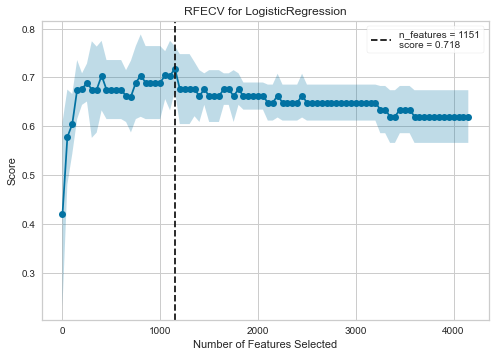

<AxesSubplot:title={'center':'RFECV for LogisticRegression'}, xlabel='Number of Features Selected', ylabel='Score'>

In [16]:
# from yellowbrick.model_selection import RFECV
# estimator = LogisticRegression(solver='lbfgs', max_iter=1000)

# visualizer = RFECV(estimator, step=50, cv=5,n_jobs=-1)

# visualizer.fit(X_train_SS, y_train)
# visualizer.show()

### **Recursive Feature elimination(RFE)** </br>
Recursive Feature elimination(RFE) method is used to find out the optimal number of features
by fitting a Logistic Regression model and removes the weakest
features.RFE attempts to eliminate dependencies and collinearity that may exist in the model.
As the optimal number of features is not known, we found the optimal number of features using cross-validation
with RFE (RFECV) to score different feature subsets and selected the best scoring collection of features. In our case we found that 1151 features are
most significant.</br>





**Above plot:**</br>

The shaded area represents the variability of cross-validation, one standard deviation above and below the mean accuracy score drawn by the curve.

In [33]:
#Sort top-features in decreasing order
top_features=np.argsort(visualizer.ranking_)
np.save('./top_features.npy', top_features)

# Model building*

With N optimal features identified, used a feature selection method of choice to select the top N features and build a multi-class classifier with cross-validation and report its accuracy and any other metric deemed suitable.


In [63]:
top_features = np.load('top_features1151.npy')
n_feature = 1151

In [64]:
# Place your code here
#Selecting top significant feaures using RFE

# n_feature = visualizer.n_features_
X_train_filtered = X_train_SS[:,top_features[:n_feature]]
X_test_filtered = X_test_SS[:,top_features[:n_feature]]

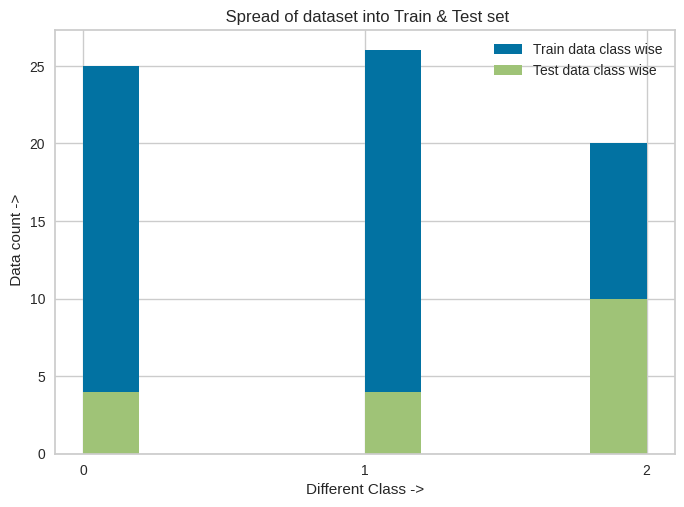

In [106]:
# Plotting distribution of data
plt.hist(y_train, label="Train data class wise")
plt.hist(y_test, label= "Test data class wise")
plt.xlabel("Different Class ->")
plt.ylabel(" Data count ->")
plt.title(" Spread of dataset into Train & Test set")
plt.xticks(list(label_to_int.values()))
plt.legend()
plt.show()

### Observation

Since the distribution of different classes in training and testing set is fairly balanced, so we will use accuracy as performance metric.

### Logistic Regression

In [118]:
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

(18, 3)

In [117]:
lr = LogisticRegression(random_state=0)
lr.fit(X_train_filtered, y_train)

y_pred = lr.predict(X_test_filtered)
pre, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')


print("Without Tuning the model")
print("Test accuracy:",round(accuracy_score(y_test, y_pred),2)*100,", Weighted => Precision:",round(pre,2)*100, ", Recall:",round(rec,2)*100, ", F1-score:",round(f1,2)*100)

Without Tuning the model
Test accuracy: 83.0 , Weighted => Precision: 90.0 , Recall: 83.0 , F1-score: 81.0


In [147]:
# lr = LogisticRegression(random_state=0)
# lr.fit(X_train_filtered, y_train)
# y_pred_lr = lr.predict_proba(X_test_filtered)

# fig, ax = plt.subplots(figsize=(6, 6))

# colors = cycle(["aqua", "darkorange", "cornflowerblue"])

# for class_id, color in zip(range(3), colors):


#     class_of_interest = int_to_label[class_id]
    
#     RocCurveDisplay.from_predictions(
#     y_onehot_test[:, class_id],
#     y_pred_lr[:, class_id],
#     name=f"{class_of_interest} vs the rest",
#     color=color,
#     ax=ax,
#     plot_chance_level=(class_id == 2),
#     # despine=True,
#     )

# _ = ax.set(
#     xlabel="False Positive Rate",
#     ylabel="True Positive Rate",
#     title=f"Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass",
# )

In [140]:
param_grid_lr = {
    'solver':['newton-cg', 'lbfgs', 'liblinear'],
            'penalty' : ['l2'],
            'C' : [10, 0.2, 0.1, 0.15]}

lr = LogisticRegression(random_state=0)

grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr,
                           n_jobs=-1, cv=5, scoring='accuracy', verbose = 2)

grid_result_lr = grid_search_lr.fit(X_train_filtered, y_train)
print("Best: %f using %s" % (grid_result_lr.best_score_, grid_result_lr.best_params_))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END .................C=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END .................C=10, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END .................C=10, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END .....................C=10, penalty=l2, 

In [141]:
y_proba = grid_result_lr.best_estimator_.predict_proba(X_test_filtered)

# Assuming y_test are integer class labels and y_proba is predicted probability matrix
classes = np.unique(y_test)
n_classes = len(classes)

# Binarize true labels for ROC computation
y_test_bin = label_binarize(y_test, classes=classes)

# y_proba = model.predict_proba(X_test)  # shape = (n_samples, n_classes)

best_thresholds = {}

for i in range(n_classes):
    fpr, tpr, thresholds = roc_curve(y_test_bin[:, i], y_proba[:, i])
    
    # Best threshold using Youden’s J
    j = tpr - fpr
    ix = np.argmax(j)
    best_thresholds[int_to_label[i]] = ((fpr[ix], tpr[ix]), thresholds[ix])

print(best_thresholds)

{'HF+': ((0.07142857142857142, 0.75), 0.17231045240754542), 'HF-': ((0.14285714285714285, 1.0), 0.6889552681859776), 'HVOL': ((0.0, 1.0), 0.7214177431370631)}


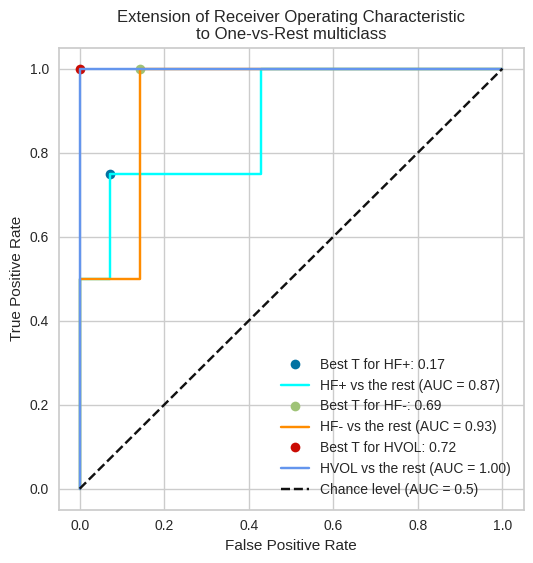

In [142]:
y_pred_lr = grid_result_lr.best_estimator_.predict_proba(X_test_filtered)

fig, ax = plt.subplots(figsize=(6, 6))

colors = cycle(["aqua", "darkorange", "cornflowerblue"])

for class_id, color in zip(range(3), colors):

    (x,y), thr = best_thresholds[int_to_label[class_id]]
    ax.plot(x, y, 'o', label=f'Best T for {int_to_label[class_id]}: {thr:.2f}')

    class_of_interest = int_to_label[class_id]
    
    RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_pred_lr[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color=color,
    ax=ax,
    plot_chance_level=(class_id == 2),
    # despine=True,
    )
    
_ = ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass",
)

In [143]:
def custom_multiclass_predict(y_proba, thresholds):
    predictions = []
    for probs in y_proba:
        passed = probs >= thresholds
        if passed.any():
            # Pick the class with highest probability among those passing threshold
            predictions.append(np.argmax(probs * passed))
        else:
            # Fallback: pick class with highest probability
            predictions.append(np.argmax(probs))
    return np.array(predictions)

threshold_array = np.array([best_thresholds[int_to_label[i]][1] for i in range(len(best_thresholds))])

y_pred_custom = custom_multiclass_predict(y_proba, threshold_array)

In [145]:
pre, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred_custom, average='weighted')

print("After Tuning the model and choosing best threshold for class")
print("Test accuracy:",round(accuracy_score(y_test, y_pred_custom),2)*100,", Weighted => Precision:",round(pre,2)*100, ", Recall:",round(rec,2)*100, ", F1-score:",round(f1,2)*100)

After Tuning the model and choosing best threshold for class
Test accuracy: 89.0 , Weighted => Precision: 93.0 , Recall: 89.0 , F1-score: 88.0


### Support Vector Classifier

In [68]:
svc = SVC()
svc.fit(X_train_filtered, y_train)
y_pred = svc.predict(X_test_filtered)

print("Without Tuning the model")
print("Test accuracy:",round(accuracy_score(y_test, y_pred),2)*100)

Without Tuning the model
Test accuracy: 83.0


In [69]:
param_grid_svc = {'C': [0.01, 0.1,1, 10],
              'gamma': [0.1,0.01,0.001],
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

# Instantiate the grid search model
grid_search_svc = GridSearchCV(estimator = svc, param_grid = param_grid_svc, cv = 5,
                           n_jobs = -1, scoring='accuracy')

grid_result_svc = grid_search_svc.fit(X_train_filtered, y_train)
print("Best: %f using %s" % (grid_result_svc.best_score_, grid_result_svc.best_params_))

y_pred_svc = grid_result_svc.best_estimator_.predict(X_test_filtered)
print("\nAfter Tuning the model")
print("Test accuracy =",round(accuracy_score(y_test, y_pred_svc),2)*100)

Best: 0.801905 using {'C': 10, 'gamma': 0.001, 'kernel': 'sigmoid'}

After Tuning the model
Test accuracy = 89.0


### Decision Tree

In [70]:
dt = DecisionTreeClassifier()
dt.fit(X_train_filtered, y_train)
y_pred_dt = dt.predict(X_test_filtered)

print("Without Tuning the model")
print("Test accuracy:",round(accuracy_score(y_test, y_pred_dt),2)*100)

Without Tuning the model
Test accuracy: 61.0


In [71]:
param_grid_dt = {'max_features': ['sqrt', 'log2'],
              'ccp_alpha': [0.0, 0.01, .02, .001],
                 'min_samples_split' : [2,3,4],
                 'min_samples_leaf' : [1,2,3],
              'max_depth' : [3,4,5, 6, 7, None],
              'criterion' :['gini', 'entropy']
             }

# Instantiate the grid search model
grid_search_dt = GridSearchCV(estimator = dt, param_grid = param_grid_dt, cv = 5,
                           n_jobs = -1, scoring='accuracy')

grid_result_dt = grid_search_dt.fit(X_train_filtered, y_train)
print("Best: %f using %s" % (grid_result_dt.best_score_, grid_result_dt.best_params_))

y_pred_dt = grid_result_dt.best_estimator_.predict(X_test_filtered)
print("\nAfter Tuning the model")
print("Test accuracy =",round(accuracy_score(y_test, y_pred_dt),2)*100)

Best: 0.677143 using {'ccp_alpha': 0.01, 'criterion': 'gini', 'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}

After Tuning the model
Test accuracy = 78.0


### Random Forest

In [43]:
rf = RandomForestClassifier()
rf.fit(X_train_filtered, y_train)
y_pred = rf.predict(X_test_filtered)

print("Without Tuning the model")
print("Test accuracy:",round(accuracy_score(y_test, y_pred),2)*100)

Without Tuning the model
Test accuracy: 72.0


In [44]:
param_grid_rf = {
    'bootstrap': [True],
    'max_depth': [3, 5, 7, 9],
    'max_features': ['sqrt','log2'],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [2,3,4],
    'n_estimators': [20, 30, 40]
}

# Instantiate the grid search model
grid_search_rf = GridSearchCV(estimator = rf, param_grid = param_grid_rf, cv = 5,
                           n_jobs = -1, scoring='accuracy')

grid_result_rf = grid_search_rf.fit(X_train_filtered, y_train)
print("Best: %f using %s" % (grid_result_rf.best_score_, grid_result_rf.best_params_))

y_pred_rf = grid_result_rf.best_estimator_.predict(X_test_filtered)
print("\nAfter Tuning the model")
print("Test accuracy =",round(accuracy_score(y_test, y_pred_rf),2)*100)

Best: 0.888571 using {'bootstrap': True, 'max_depth': 9, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 40}

After Tuning the model
Test accuracy = 67.0


### Neural Network

In [52]:
!pip3 install numpy==1.24


  Obtaining dependency information for numpy==1.24 from https://files.pythonhosted.org/packages/b0/26/8fbdd09f9926dffc272cbb266f7079963f774190ba0b5fddf72097b2c728/numpy-1.24.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached numpy-1.24.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.24.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.4
    Uninstalling numpy-2.2.4:
      Successfully uninstalled numpy-2.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires cython>=0.29.21, which is not installed.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
tables 3.8.0 requires blosc2~=2.0.0, but you have blosc2 3.3.0 which is incompatible.
seaborn 0.12.2 require

In [51]:
pip install blosc2

  Obtaining dependency information for blosc2 from https://files.pythonhosted.org/packages/a6/91/d6abdbc7a08b0a519b928263c6956c3e2dda26942b6f9105021926ff3e50/blosc2-3.3.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for numpy>=1.26 from https://files.pythonhosted.org/packages/c5/5c/ceefca458559f0ccc7a982319f37ed07b0d7b526964ae6cc61f8ad1b6119/numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.4 MB/s eta 0:00:00
  Obtaining dependency information for ndindex from https://files.pythonhosted.org/packages/51/2d/bfc284ecc9b24acb916f5d04a69357ae56e0b6073286eaa71cf54bf0b136/ndindex-1.9.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 1.9 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 2.5 MB/s eta 0:00:00m eta 0:00:010:00:01
   

In [47]:
pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/ba/1c/370b5546cf7afc29649b2fb74c171ef2493a36f62cf901c1425ead4a56af/tensorflow-2.19.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/f6/d4/349f7f4bd5ea92dab34f5bb0fe31775ef6c311427a14d5a5b31ecb442341/absl_py-2.2.2-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=24.3.25 from https://files.pythonhosted.org/packages/b8/25/155f9f080d5e4bc0082edfda032ea2bc2b8fab3f4d25d46c1e9dd22a1a89/flatbuffers-25.2.10-py2.py3-none-any.whl.metadata
  Obtaining dependency information for gast!=0.5.0,!=0.5.1,!=0.5.2,>=0.2.1 from https://files.pythonhosted.o

In [53]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, ReLU, Dropout

In [54]:
# Building Neural Network
model = Sequential()
model.add(Dense(100, input_shape=(X_train_filtered.shape[1],)))
model.add(Dropout(0.2))
model.add(ReLU())
model.add(Dense(10))
model.add(Dropout(0.2))
model.add(ReLU())
model.add(Dense(10))
model.add(Dropout(0.2))
model.add(ReLU())
model.add(Dense(3))
model.add(Activation('softmax'))

# Compile the model and calculate its accuracy:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

# Print a summary of the Keras model:
print(model.summary())

/home/karan.gujarati/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-14 21:03:16.867197: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │         5,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            33 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 3)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,353 (24.82 KB)

 Trainable params: 6,353 (24.82 KB)

 Non-trainable params: 0 (0.00 B)

None


In [55]:
# callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

history = model.fit(X_train_filtered, y_train, batch_size=10, 
          epochs=100, validation_split=0.2, shuffle=True, verbose = 0)#callbacks=[callback])

y_predicted = model.predict(X_test_filtered)
y_pred_nn = [np.argmax(i) for i in y_predicted]
print("\nTest accuracy of Neural Newtork model =",round(accuracy_score(y_test, y_pred_nn),2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step

Test accuracy of Neural Newtork model = 0.61


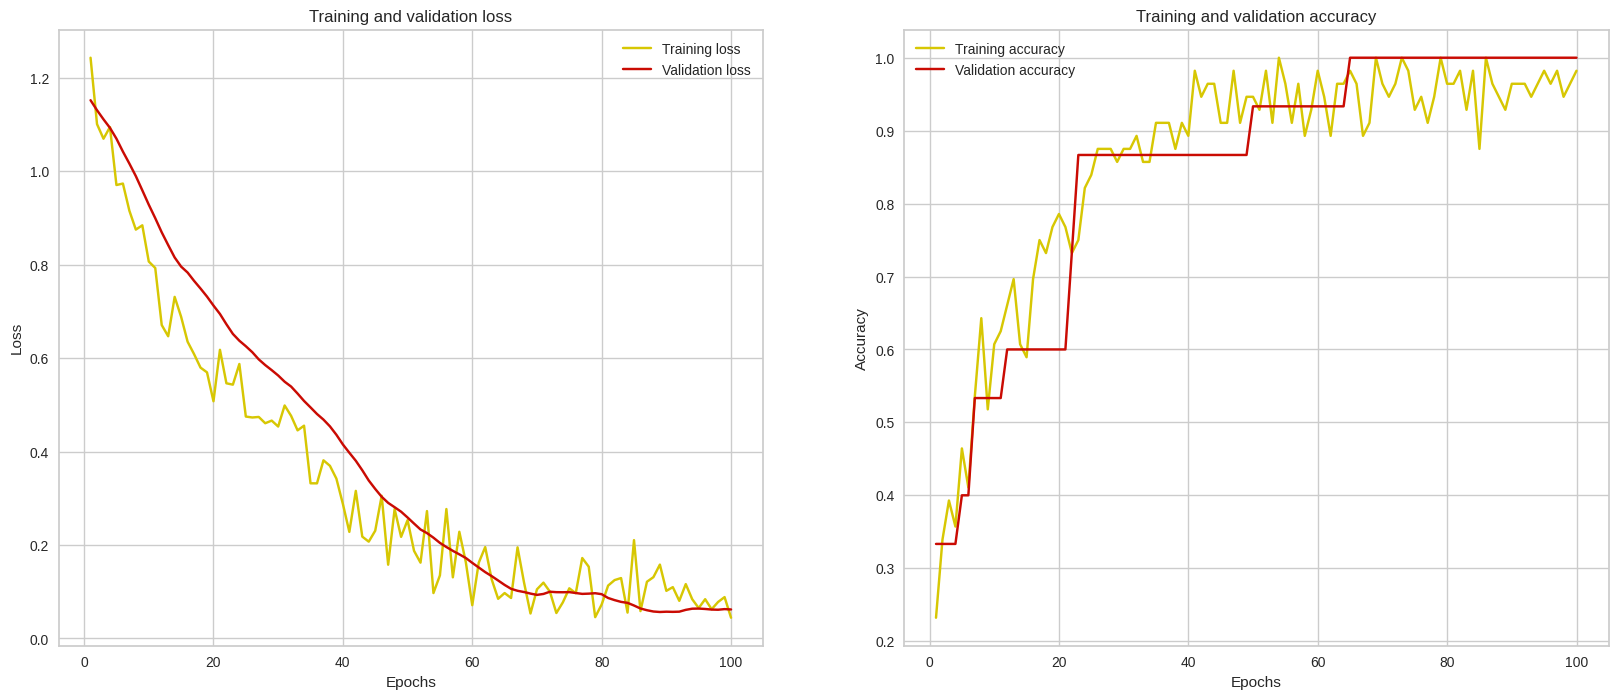

In [56]:
# Plot loss vs epoch
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting accuracy vs epoch
plt.subplot(1,2,2)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Model evaluation*

- Apply the model on the test set and report the accuracy and per class sensitivity i.e the total number of samples in a given class within the test set, and how many were predicted accurately.
- Also report as a binary matrix how many samples were correctly identified as HF+/HF- and HVOL

|    |      HF+/-      |  HVOL |
|----------|:-------------:|------:|
| HF+/- |  . | . |
| HVOL |    .   | . |


In [101]:
# Place your code here
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sn


model_predictions = [y_pred_lr,y_pred_svc, y_pred_dt, y_pred_rf, y_pred_nn]
model_name = ['Logistic Regression', 'Support Vector Classifier','Decision Tree', 'Random Forest', 'Neural Network']
res=[]
for i in model_predictions:
    temp = classification_report(y_test,i, output_dict=True)
    res.append(list(round(pd.DataFrame(temp).iloc[1][:4],2)))

df = pd.DataFrame(res)
df.index = model_name
df.columns = ['Sensitivity_HF+', 'Sensitivity_HF-', 'Sensitivity_HVOL', 'Accuracy']

In [102]:
def highlight_rows(x):
    if x.Accuracy>0.85:
        return['background-color: yellow']*4
    
df.style.apply(highlight_rows, axis = 1)

,Sensitivity_HF+,Sensitivity_HF-,Sensitivity_HVOL,Accuracy
Logistic Regression,0.750000,1.000000,1.000000,0.890000
Support Vector Classifier,0.750000,1.000000,1.000000,0.890000
Decision Tree,0.380000,0.670000,1.000000,0.670000
Random Forest,0.500000,1.000000,1.000000,0.780000
Neural Network,0.500000,1.000000,1.000000,0.780000


In [75]:
def confusion_mat(y_true, y_pred_list, model_name):
    y_true = np.array(y_true)
    y_true[y_true==1]=0
    
    plt.figure(figsize=(20,10))
    
    for i in range(len(y_pred_list)):
        
        y_pred = np.array(y_pred_list[i])
        y_pred[y_pred==1]=0
        
        plt.subplot(2,3,i+1)
        plt.tight_layout()
        cm = confusion_matrix(y_true, y_pred)
        df_cm = pd.DataFrame(cm, columns=['HF +/-', 'HVOL'], index = ['HF +/-', 'HVOL'])
        df_cm.index.name = 'Actual'
        df_cm.columns.name = 'Predicted'
        sn.set(font_scale=1.4)
        sn.heatmap(df_cm, annot=True)
        plt.title(f'{model_name[i]}', fontsize=25)
    plt.show()

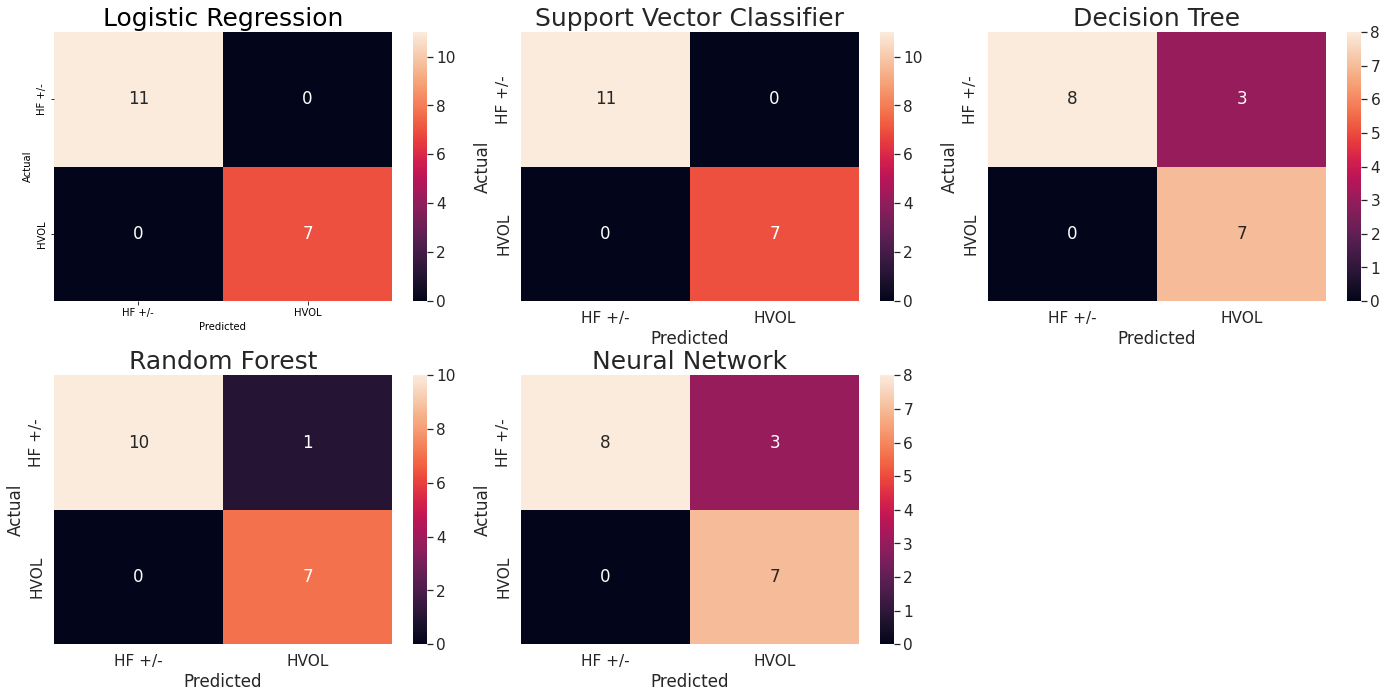

In [76]:
confusion_mat(y_test, model_predictions, model_name)

### Discussion

1.  Logistic Regression, Support Vector Machine, Decision Tree, Random Forest and ANN were implemented for the task of multi-class classification on the given dataset. Since the dataset is balanced and under the assumption of all classes are of equal weightage, we choose **'accuracy'** as our metric of choice for the selection of best model during cross-validation. Optimal hyperparamters were chosen by grid search.
<br><br>
2. Results suggest that **Logistic Regression (Multinomial) and Support Vector Machine (Linear Kernel)** performed best among all the models with close to 89% classification accuracy.
<br><br>
3. This is expected since number of data points were pretty small (72 in training set). Hence simpler models are good enough to capture the patterns in this case in comparison to more complex models that are likely overfit in each training fold during cross-validation.
<br><br>
4. **From clinical point of view, recall / sensitivity is an important metric** (since we don't want a patient to go untreated just because of our model's wrong prediction). This is especially true for HF+ class where there is a chance of casualty. Our results suggest that we can achieve a recall of close to 1 for HF- and HVOL class, **however recall is usually lower (0.75 for best performing logistic regression model) for HF+ class. Since HF+ class is the most important class from clinical point of view, there is still scope of improvement in our modelling technique.**

### Potential Improvements

1. **Data Collection** : The given dataset size is pretty small. This makes our ML model sensitive to random train/test split. Further, since test set size is merely 18, it's difficult to infer class-wise sensitivity reliably from this dataset. Hence, to benchmark the performance of ML models, we need a larger dataset.
<br><br>
2. **Interpretability-Accuracy Tradeoff** : To retain the interpretability (i.e. to identify the gene responsible for a particular classification), we have used feature selection method in this notebook. However, we could also have used feature extraction methods (e.g. PCA and other non-linear manifold based methods). Since feature extraction methods engineers new features through recombination of original features, it might contain stronger signal leading to better classification performance at the cost of loss of interpretability.
<br><br>
3. **Choice of metric / loss function** : Depending on the clinical priority, if one class is considered more important than others, then this can be incorporated in the model thorugh weighted loss function (e.g. in neural networks). Similarly, if sensitivity is considered as a more important metric than accuracy, then probably micro/macro/weighted average of recall can be used as metric during model selection process.

# Biological significance of features

- Take the top 5 features and search for their gene names in [Gene Cards](https://www.genecards.org/) with using the suffix for example:
  ENSG00000000419.12 -> ENSG00000000419	
  
- Take the gene names identified and search in [Pubmed](https://pubmed.ncbi.nlm.nih.gov/) as 
  "Gene name" AND "coronary disease"
  
- Report if anything of interest is found by reading the abstract of the top hits in pubmed.

In [103]:
data.columns[top_features[:5]]

Index(['ENSG00000103202.13', 'ENSG00000164292.13', 'ENSG00000164305.19',
       'ENSG00000164306.11', 'ENSG00000134882.16'],
      dtype='object')

ENSG00000103202 &rarr; NME4 (NME/NM23 Nucleoside Diphosphate Kinase 4) </br>
ENSG00000164292 &rarr; RHOBTB3 (Rho Related BTB Domain Containing 3) </br>
ENSG00000164305 &rarr; CASP3 (Caspase 3) </br>
ENSG00000164306 &rarr; PRIMPOL (Primase And DNA Directed Polymerase) </br>
ENSG00000134882 &rarr; UBAC2 (UBA Domain Containing 2)

## Observation


While searching for the connection of top 5 genes with coronary heart disease, it was noted that genes whose expression is related to protein metabolism, cell proliferation and inflammation are connected to coronary heart diseases. It will be interesting to find such genes from different studies and find their correlation to given classes in the data, thus giving more weight to such features can improve our model. </br>

Expression profile of circular RNAs in epicardial adipose tissue in heart failure”, Mei-Li Zheng a study done in November 2020 was based on  extending the existing studies that circular RNA expression profiles can be detected in various tissue types. This study aimed at identifying the genes corresponding to circular RNAs thus it found the genes that were involved in cell proliferation and inflammatory response i.e. involved in coronary heart diseases. One of these genes is **RHOBTB3**. This study confirms that such specific genes through circular RNAs show connection to heart failure in Humans.


